# Introduction
 
Clustering analysis is an unsupervised learning method that separates the data points into several specific bunches or groups, such that the data points in the same groups have similar properties and data points in different groups have different properties in some sense.

It comprises of many different methods based on different distance measures. E.g. K-Means (distance between points), Affinity propagation (graph distance), Mean-shift (distance between points), DBSCAN (distance between nearest points), Gaussian mixtures (Mahalanobis distance to centers), Spectral clustering (graph distance), etc.

Centrally, all clustering methods use the same approach i.e. first we calculate similarities and then we use it to cluster the data points into groups or batches. Here we will focus on the Density-based spatial clustering of applications with noise (DBSCAN) clustering method.

<b>Why do we need a Density-Based clustering algorithm like DBSCAN when we already have K-means clustering?</b>

K-Means clustering may cluster loosely related observations together. Every observation becomes a part of some cluster eventually, even if the observations are scattered far away in the vector space. Since clusters depend on the mean value of cluster elements, each data point plays a role in forming the clusters. A slight change in data points might affect the clustering outcome. This problem is greatly reduced in DBSCAN due to the way clusters are formed. This is usually not a big problem unless we come across some odd shape data.

Another challenge with k-means is that you need to specify the number of clusters (“k”) in order to use it. Much of the time, we won’t know what a reasonable k value is a priori.

What’s nice about DBSCAN is that you don’t have to specify the number of clusters to use it. All you need is a function to calculate the distance between values and some guidance for what amount of distance is considered “close”. DBSCAN also produces more reasonable results than k-means across a variety of different distributions. Below figure illustrates the fact :<img src="https://miro.medium.com/max/1339/0*xu3GYMsWu9QiKNOo.png">
 
Density-Based Clustering Algorithms
 
Density-Based Clustering refers to unsupervised learning methods that identify distinctive groups/clusters in the data, based on the idea that a cluster in data space is a contiguous region of high point density, separated from other such clusters by contiguous regions of low point density.

Density-Based Spatial Clustering of Applications with Noise (DBSCAN) is a base algorithm for density-based clustering. It can discover clusters of different shapes and sizes from a large amount of data, which is containing noise and outliers.

The DBSCAN algorithm uses two parameters:

<ul>    
<li>minPts: The minimum number of points (a threshold) clustered together for a region to be considered dense.</li>
<li>eps (ε): A distance measure that will be used to locate the points in the neighborhood of any point.</li>
These parameters can be understood if we explore two concepts called Density Reachability and Density Connectivity.

Reachability in terms of density establishes a point to be reachable from another if it lies within a particular distance (eps) from it.

Connectivity, on the other hand, involves a transitivity based chaining-approach to determine whether points are located in a particular cluster. For example, p and q points could be connected if p->r->s->t->q, where a->b means b is in the neighborhood of a.
    
There are three types of points after the DBSCAN clustering is complete: <img src="https://miro.medium.com/max/627/1*yT96veo7Zb5QeswV7Vr7YQ.png">
<ul>
    <li>Core — This is a point that has at least m points within distance n from itself.</li>
    <li>Border — This is a point that has at least one Core point at a distance n.</li>
    <li>Noise — This is a point that is neither a Core nor a Border. And it has less than m points within distance n from itself.</li>
</ul>
    
<b>Algorithmic steps for DBSCAN clustering</b>
<ul>
    <li>The algorithm proceeds by arbitrarily picking up a point in the dataset (until all points have been visited).</li>
    <li>If there are at least ‘minPoint’ points within a radius of ‘ε’ to the point then we consider all these points to be part of the same cluster.</li>
    <li>The clusters are then expanded by recursively repeating the neighborhood calculation for each neighboring point.</li>
<ul>
<img src="https://miro.medium.com/proxy/1*tc8UF-h0nQqUfLC8-0uInQ.gif">

<b>Parameter Estimation</b>
Every data mining task has the problem of parameters. Every parameter influences the algorithm in specific ways. For DBSCAN, the parameters ε and minPts are needed.
<ul>
    <li>minPts: As a rule of thumb, a minimum minPts can be derived from the number of dimensions D in the data set, as minPts ≥ D + 1. The low value minPts = 1 does not make sense, as then every point on its own will already be a cluster. With minPts ≤ 2, the result will be the same as of hierarchical clustering with the single link metric, with the dendrogram cut at height ε. Therefore, minPts must be chosen at least 3. However, larger values are usually better for data sets with noise and will yield more significant clusters. As a rule of thumb, minPts = 2·dim can be used, but it may be necessary to choose larger values for very large data, for noisy data or for data that contains many duplicates.</li>
    <li>ε: The value for ε can then be chosen by using a k-distance graph, plotting the distance to the k = minPts-1 nearest neighbor ordered from the largest to the smallest value. Good values of ε are where this plot shows an “elbow”: if ε is chosen much too small, a large part of the data will not be clustered; whereas for a too high value of ε, clusters will merge and the majority of objects will be in the same cluster. In general, small values of ε are preferable, and as a rule of thumb, only a small fraction of points should be within this distance of each other.</li>
    <li>Distance function: The choice of distance function is tightly linked to the choice of ε, and has a major impact on the outcomes. In general, it will be necessary to first identify a reasonable measure of similarity for the data set, before the parameter ε can be chosen. There is no estimation for this parameter, but the distance functions need to be chosen appropriately for the data set.</li>
</ul>
         
Let us first apply DBSCAN to cluster spherical data.
We first generate 750 spherical training data points with corresponding labels. After that standardize the features of training data and at last, apply DBSCAN from the sklearn library.

In [1]:
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Generate sample data
centers = [[1, 1], [-1, -1], [1, -1]]
X, labels_true = make_blobs(n_samples=750, centers=centers, cluster_std=0.4,
                            random_state=0)

In [3]:
X = StandardScaler().fit_transform(X)

In [4]:
# Compute DBSCAN
db = DBSCAN(eps=0.3, min_samples=10).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

In [5]:
# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

In [6]:
print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)
print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels))
print("Completeness: %0.3f" % metrics.completeness_score(labels_true, labels))
print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels))
print("Adjusted Rand Index: %0.3f"
      % metrics.adjusted_rand_score(labels_true, labels))
print("Adjusted Mutual Information: %0.3f"
      % metrics.adjusted_mutual_info_score(labels_true, labels))
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X, labels))

Estimated number of clusters: 3
Estimated number of noise points: 18
Homogeneity: 0.953
Completeness: 0.883
V-measure: 0.917
Adjusted Rand Index: 0.952
Adjusted Mutual Information: 0.916
Silhouette Coefficient: 0.626


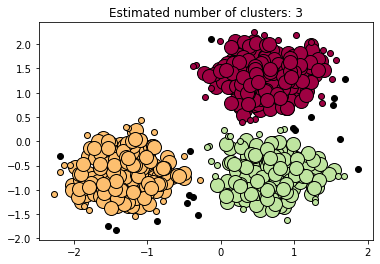

In [7]:
# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)
    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

Non Spherical Data

In [8]:
from sklearn.datasets import make_circles
X, y = make_circles(n_samples=750, factor=0.3, noise=0.1)
X = StandardScaler().fit_transform(X)
y_pred = DBSCAN(eps=0.3, min_samples=10).fit_predict(X)

Number of clusters: 2
Homogeneity: 0.9999999999999993
Completeness: 0.8968895037147229
V-measure: 0.917
Adjusted Rand Index: 0.952
Adjusted Mutual Information: 0.916
Silhouette Coefficient: -0.058


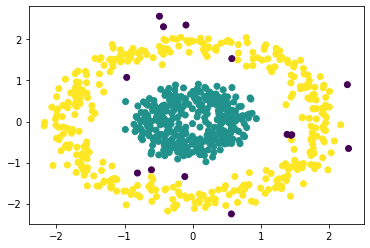

In [9]:
plt.scatter(X[:,0], X[:,1], c=y_pred)
print('Number of clusters: {}'.format(len(set(y_pred[np.where(y_pred != -1)]))))
print('Homogeneity: {}'.format(metrics.homogeneity_score(y, y_pred)))
print('Completeness: {}'.format(metrics.completeness_score(y, y_pred)))
print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels))
print("Adjusted Rand Index: %0.3f"
      % metrics.adjusted_rand_score(labels_true, labels))
print("Adjusted Mutual Information: %0.3f"
      % metrics.adjusted_mutual_info_score(labels_true, labels))
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X, labels))

# The complexity of DBSCAN Clustering Algorithm
 
<ul>
<li>Best Case: If an indexing system is used to store the dataset such that neighborhood queries are executed in logarithmic time, we get O(nlogn) average runtime complexity.</li>
<li>Worst Case: Without the use of index structure or on degenerated data (e.g. all points within a distance less than ε), the worst-case run time complexity remains O(n²).</li>
<li>Average Case: Same as best/worst case depending on data and implementation of the algorithm.</li>
</ul>

# Conclusion
 
Density-based clustering algorithms can learn clusters of arbitrary shape, and with the Level Set Tree algorithm, one can learn clusters in datasets that exhibit wide differences in density.

However, I should point out that these algorithms are somewhat more arduous to tune contrasted to parametric clustering algorithms like K-Means. Parameters like the epsilon for DBSCAN or for the Level Set Tree are less intuitive to reason about compared to the number of clusters parameter for K-Means, so it’s more difficult to choose good initial parameter values for these algorithms.